<a href="https://colab.research.google.com/github/nalrob/Procesamiento_de_datos/blob/main/Practica7_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Técnica utilizada: Pytorch y Albumentations**

Albumentations es una biblioteca de aumento de datos en Python que se utiliza principalmente en tareas de visión por computadora, como la clasificación de imágenes, la detección de objetos y la segmentación semántica.

El aumento de datos es una técnica clave en el entrenamiento de modelos de aprendizaje profundo para mejorar la generalización y evitar el sobreajuste.

In [ ]:
pip install albumentations

In [ ]:
from albumentations.pytorch import To Tensor

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving FIRE_images.zip to FIRE_images.zip


In [ ]:
import zipfile
import io

with open('FIRE_images.zip', 'wb') as f:
    f.write(uploaded['FIRE_images.zip'])

data = zipfile.ZipFile(io.BytesIO(uploaded['FIRE_images.zip']), 'r')
data.extractall()

In [ ]:
import zipfile
import os
import pandas as pd

# Ruta del archivo ZIP y directorio de extracción
zip_file_path = 'FIRE_images.zip'  # Ruta del archivo ZIP
extract_path = '/content/Fire_images'  # Ruta donde se extraerán las imágenes

# Crear el directorio de extracción si no existe
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Extraer el contenido del archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listar los nombres de los archivos extraídos
extracted_files = os.listdir(extract_path)

In [ ]:
from PIL import Image

# Lista de carpetas de imágenes y sus etiquetas
folders = [

    ("/content/fire_images", "fire"),
    ("/content/non_fire_images", "non_fire"),
]

dfs = []


for folder_path, label in folders:
    data = []
    for dirname, _, filenames in os.walk(folder_path):
        for filename in filenames:
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Ajusta las extensiones permitidas
                img_path = os.path.join(dirname, filename)
                data.append({'path': img_path, 'label': label})
    df_temp = pd.DataFrame(data)
    dfs.append(df_temp)


df = pd.concat(dfs, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
print(df.head(10))

                                        path     label
0  /content/non_fire_images/non_fire.213.png  non_fire
1          /content/fire_images/fire.153.png      fire
2   /content/non_fire_images/non_fire.68.png  non_fire
3  /content/non_fire_images/non_fire.162.png  non_fire
4          /content/fire_images/fire.178.png      fire
5          /content/fire_images/fire.175.png      fire
6  /content/non_fire_images/non_fire.125.png  non_fire
7   /content/non_fire_images/non_fire.42.png  non_fire
8           /content/fire_images/fire.70.png      fire
9  /content/non_fire_images/non_fire.153.png  non_fire


In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import load_img


sns.set_style('darkgrid')

In [ ]:
from PIL import Image
import pandas as pd
import io
import base64


def extract_encoded_pixels(png_path):
    try:
        with open(png_path, 'rb') as image_file:
            # Leer la imagen en formato binario
            image_binary = image_file.read()

        # Convertir la imagen binaria a base64
        encoded_pixels = base64.b64encode(image_binary).decode('utf-8')
        return encoded_pixels
    except Exception as e:
        # Manejar cualquier excepción que pueda ocurrir
        return None

df['EncodedPixels'] = df['path'].apply(extract_encoded_pixels)

In [ ]:
df['id'] = df['path'].apply(lambda x: x.split('/')[-1])

In [ ]:
label_mapping = {"fire": 1, "non_fire": 0}

df['label'] = df['label'].replace(label_mapping)
df['label'] = df['label'].fillna(0).astype(int)

print(df[['id', 'path', 'label', 'EncodedPixels']])


                   id                                       path  label  \
0    non_fire.213.png  /content/non_fire_images/non_fire.213.png      0   
1        fire.153.png          /content/fire_images/fire.153.png      1   
2     non_fire.68.png   /content/non_fire_images/non_fire.68.png      0   
3    non_fire.162.png  /content/non_fire_images/non_fire.162.png      0   
4        fire.178.png          /content/fire_images/fire.178.png      1   
..                ...                                        ...    ...   
406      fire.137.png          /content/fire_images/fire.137.png      1   
407  non_fire.208.png  /content/non_fire_images/non_fire.208.png      0   
408        fire.8.png            /content/fire_images/fire.8.png      1   
409   non_fire.19.png   /content/non_fire_images/non_fire.19.png      0   
410      fire.162.png          /content/fire_images/fire.162.png      1   

                                         EncodedPixels  
0    /9j/4QA8RXhpZgAASUkqAAgAAAABAJiCAgAYA

In [ ]:
import os
import cv2
import pdb
import time
import warnings
import random
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader, Dataset, sampler
from matplotlib import pyplot as plt
from albumentations import (HorizontalFlip, ShiftScaleRotate, Normalize, Resize, Compose, GaussNoise)
warnings.filterwarnings("ignore")
seed = 69
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [ ]:
#df = df.pivot(index='id',columns='class',values='EncodedPixels')

In [ ]:
from collections import defaultdict
import copy
import random
import os
import shutil
from urllib.request import urlretrieve

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

cudnn.benchmark = True

Define functions to download an archived dataset and unpack it

In [ ]:
class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)


def download_url(url, filepath):
    directory = os.path.dirname(os.path.abspath(filepath))
    os.makedirs(directory, exist_ok=True)
    if os.path.exists(filepath):
        print("Filepath already exists. Skipping download.")
        return

    with TqdmUpTo(unit="B", unit_scale=True, unit_divisor=1024, miniters=1, desc=os.path.basename(filepath)) as t:
        urlretrieve(url, filename=filepath, reporthook=t.update_to, data=None)
        t.total = t.n


def extract_archive(filepath):
    extract_dir = os.path.dirname(os.path.abspath(filepath))
    shutil.unpack_archive(filepath, extract_dir)

Normalization

In [ ]:
import cv2
import numpy as np

X, y, image_paths = [], [], []  # Agregamos una lista para almacenar las rutas de las imágenes

for index, row in df.iterrows():
    image_path = row['path']
    label = row['label']

    img = cv2.imread(image_path)

    # Normalización
    if img is not None:
        img = cv2.resize(img, (64, 64))
        img = img.reshape(64 * 64 * 3)

        X.append(img)
        y.append(label)
        image_paths.append(image_path)  # Almacenamos la ruta de la imagen

X_samp = np.array(X)
y_samp = np.array(y)
images= np.array(image_paths)

In [ ]:
correct_images_filepaths = [i for i in image_paths if cv2.imread(i) is not None]

Split files from the dataset into the train and validation sets

In [ ]:
random.seed(42)
random.shuffle(correct_images_filepaths)
train_images_filepaths = correct_images_filepaths[:20000]
val_images_filepaths = correct_images_filepaths[20000:-10]
test_images_filepaths = correct_images_filepaths[-10:]
print(len(train_images_filepaths), len(val_images_filepaths), len(test_images_filepaths))

410 0 10


Define a function to visualize images and their labels

In [ ]:
def display_image_grid(images_filepaths, predicted_labels=(), cols=5):
    rows = len(images_filepaths) // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i, image_filepath in enumerate(images_filepaths):
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        true_label = os.path.normpath(image_filepath).split(os.sep)[-2]
        predicted_label = predicted_labels[i] if predicted_labels else true_label
        color = "green" if true_label == predicted_label else "red"
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_title(predicted_label, color=color)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

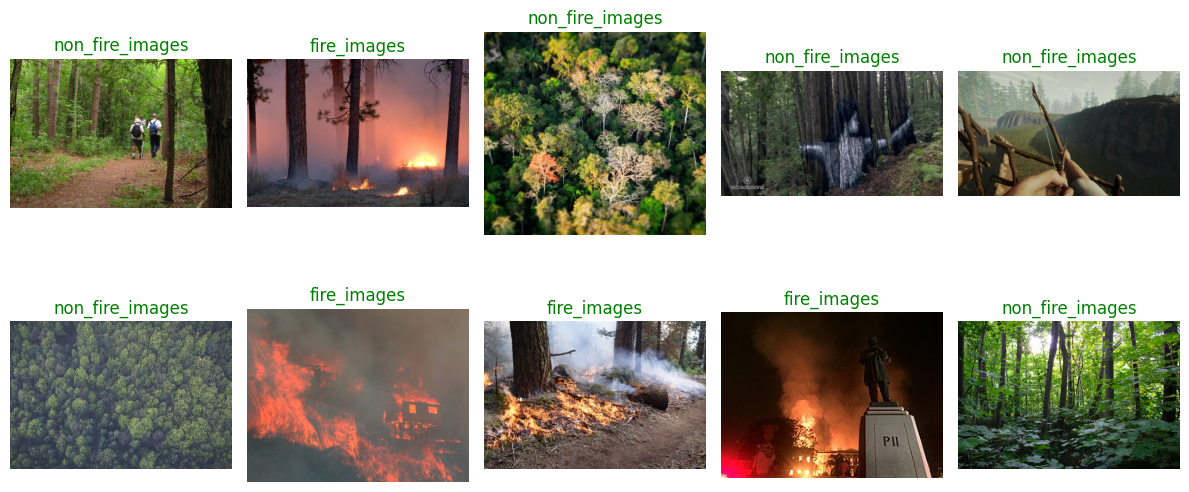

In [ ]:
display_image_grid(test_images_filepaths)

Define a PyTorch dataset class

In [ ]:
class FireDataset(Dataset):
    def __init__(self, images_filepaths, transform=None):
        self.images_filepaths = images_filepaths
        self.transform = transform

    def __len__(self):
        return len(self.images_filepaths)

    def __getitem__(self, idx):
        image_filepath = self.images_filepaths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if os.path.normpath(image_filepath).split(os.sep)[-2] == "fire_images":
            label = 1.0
        else:
            label = 0.0
        if self.transform is not None:
            image = self.transform(image=image)["image"]
        return image, label

Use Albumentations to define transformation functions for the train and validation datasets

In [ ]:
train_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=128, width=128),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
train_dataset = FireDataset(images_filepaths=train_images_filepaths, transform=train_transform)

In [ ]:
val_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.CenterCrop(height=128, width=128),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
val_dataset = FireDataset(images_filepaths=val_images_filepaths, transform=val_transform)

In [ ]:
def visualize_augmentations(dataset, idx=0, samples=10, cols=5):
    dataset = copy.deepcopy(dataset)
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i in range(samples):
        image, _ = dataset[idx]
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

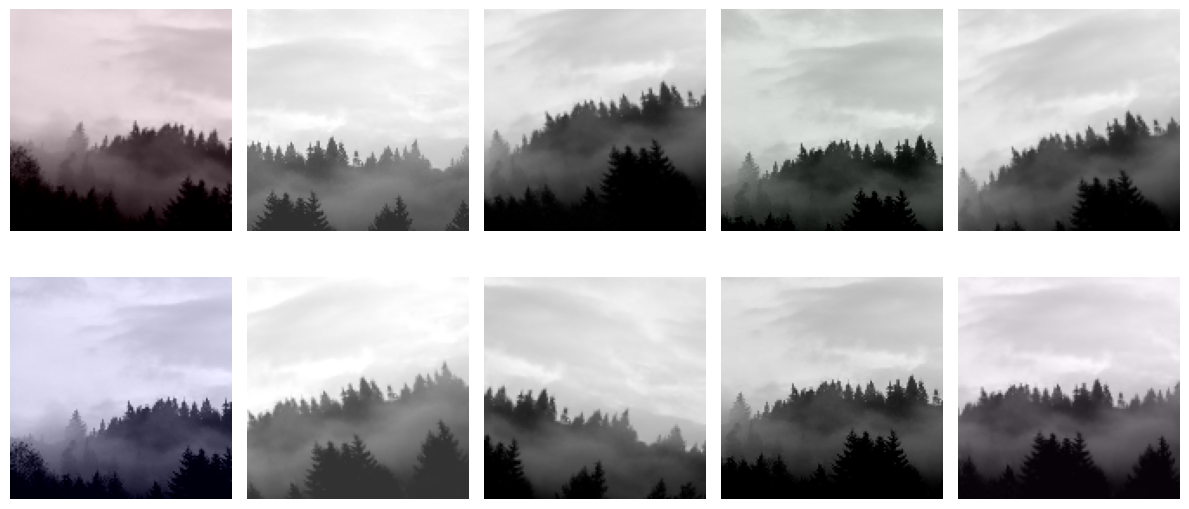

In [ ]:
random.seed(42)
visualize_augmentations(train_dataset)

Define helpers for training

In [ ]:
def calculate_accuracy(output, target):
    output = torch.sigmoid(output) >= 0.5
    target = target == 1.0
    return torch.true_divide((target == output).sum(dim=0), output.size(0)).item()

In [ ]:
class MetricMonitor:
    def __init__(self, float_precision=3):
        self.float_precision = float_precision
        self.reset()

    def reset(self):
        self.metrics = defaultdict(lambda: {"val": 0, "count": 0, "avg": 0})

    def update(self, metric_name, val):
        metric = self.metrics[metric_name]

        metric["val"] += val
        metric["count"] += 1
        metric["avg"] = metric["val"] / metric["count"]

    def __str__(self):
        return " | ".join(
            [
                "{metric_name}: {avg:.{float_precision}f}".format(
                    metric_name=metric_name, avg=metric["avg"], float_precision=self.float_precision
                )
                for (metric_name, metric) in self.metrics.items()
            ]
        )

Define training parameters

In [ ]:
params = {
    "model": "resnet50",
    "device": "cuda",
    "lr": 0.001,
    "batch_size": 64,
    "num_workers": 4,
    "epochs": 10,
}

Create all required objects and functions for training and validation

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models


#model = getattr(models, params["model"])(pretrained=False, num_classes=1)
#device = torch.device("cpu")
#model = model.to(device)
criterion = nn.BCEWithLogitsLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=params["lr"])


In [ ]:
model = getattr(models, params["model"])(pretrained=False, num_classes=1,)
model = model.to(params["device"])
criterion = nn.BCEWithLogitsLoss().to(params["device"])
optimizer = torch.optim.Adam(model.parameters(), lr=params["lr"])

In [ ]:
train_loader = DataLoader(
    train_dataset, batch_size=params["batch_size"], shuffle=True, num_workers=params["num_workers"], pin_memory=True,
)
val_loader = DataLoader(
    val_dataset, batch_size=params["batch_size"], shuffle=False, num_workers=params["num_workers"], pin_memory=True,
)

In [ ]:
def train(train_loader, model, criterion, optimizer, epoch, params):
    metric_monitor = MetricMonitor()
    model.train()
    stream = tqdm(train_loader)
    for i, (images, target) in enumerate(stream, start=1):
        images = images.to(params["device"], non_blocking=True)
        target = target.to(params["device"], non_blocking=True).float().view(-1, 1)
        output = model(images)
        loss = criterion(output, target)
        accuracy = calculate_accuracy(output, target)
        metric_monitor.update("Loss", loss.item())
        metric_monitor.update("Accuracy", accuracy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        stream.set_description(
            "Epoch: {epoch}. Train.      {metric_monitor}".format(epoch=epoch, metric_monitor=metric_monitor)
        )

In [ ]:
def validate(val_loader, model, criterion, epoch, params):
    metric_monitor = MetricMonitor()
    model.eval()
    stream = tqdm(val_loader)
    with torch.no_grad():
        for i, (images, target) in enumerate(stream, start=1):
            images = images.to(params["device"], non_blocking=True)
            target = target.to(params["device"], non_blocking=True).float().view(-1, 1)
            output = model(images)
            loss = criterion(output, target)
            accuracy = calculate_accuracy(output, target)

            metric_monitor.update("Loss", loss.item())
            metric_monitor.update("Accuracy", accuracy)
            stream.set_description(
                "Epoch: {epoch}. Validation. {metric_monitor}".format(epoch=epoch, metric_monitor=metric_monitor)
            )

Train a model

In [ ]:
pip install torch torchvision torchaudio

In [ ]:
import torch

print(torch.cuda.is_available())  # Debería imprimir False


True


In [ ]:
for epoch in range(1, params["epochs"] + 1):
    train(train_loader, model, criterion, optimizer, epoch, params)
    validate(val_loader, model, criterion, epoch, params)

Epoch: 1. Train.      Loss: 1.266 | Accuracy: 0.616: 100%|██████████| 7/7 [00:23<00:00,  3.30s/it]
0it [00:00, ?it/s]
Epoch: 2. Train.      Loss: 0.450 | Accuracy: 0.796: 100%|██████████| 7/7 [00:12<00:00,  1.73s/it]
0it [00:00, ?it/s]
Epoch: 3. Train.      Loss: 0.327 | Accuracy: 0.866: 100%|██████████| 7/7 [00:10<00:00,  1.47s/it]
0it [00:00, ?it/s]
Epoch: 4. Train.      Loss: 0.340 | Accuracy: 0.831: 100%|██████████| 7/7 [00:11<00:00,  1.62s/it]
0it [00:00, ?it/s]
Epoch: 5. Train.      Loss: 0.271 | Accuracy: 0.865: 100%|██████████| 7/7 [00:12<00:00,  1.79s/it]
0it [00:00, ?it/s]
Epoch: 6. Train.      Loss: 0.263 | Accuracy: 0.887: 100%|██████████| 7/7 [00:12<00:00,  1.78s/it]
0it [00:00, ?it/s]
Epoch: 7. Train.      Loss: 0.352 | Accuracy: 0.838: 100%|██████████| 7/7 [00:11<00:00,  1.71s/it]
0it [00:00, ?it/s]
Epoch: 8. Train.      Loss: 0.299 | Accuracy: 0.847: 100%|██████████| 7/7 [00:10<00:00,  1.44s/it]
0it [00:00, ?it/s]
Epoch: 9. Train.      Loss: 0.232 | Accuracy: 0.896: 100

Predict labels for images and visualize those predictions

In [ ]:
class FireInferenceDataset(Dataset):
    def __init__(self, images_filepaths, transform=None):
        self.images_filepaths = images_filepaths
        self.transform = transform

    def __len__(self):
        return len(self.images_filepaths)

    def __getitem__(self, idx):
        image_filepath = self.images_filepaths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform is not None:
            image = self.transform(image=image)["image"]
        return image

test_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.CenterCrop(height=128, width=128),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
test_dataset = FireInferenceDataset(images_filepaths=test_images_filepaths, transform=test_transform)
test_loader = DataLoader(
    test_dataset, batch_size=params["batch_size"], shuffle=False, num_workers=params["num_workers"], pin_memory=True,
)

In [ ]:
model = model.eval()
predicted_labels = []
with torch.no_grad():
    for images in test_loader:
        images = images.to(params["device"], non_blocking=True)
        output = model(images)
        predictions = (torch.sigmoid(output) >= 0.5)[:, 0].cpu().numpy()
        predicted_labels += ["Fire" if is_fire else "Non Fire" for is_fire in predictions]

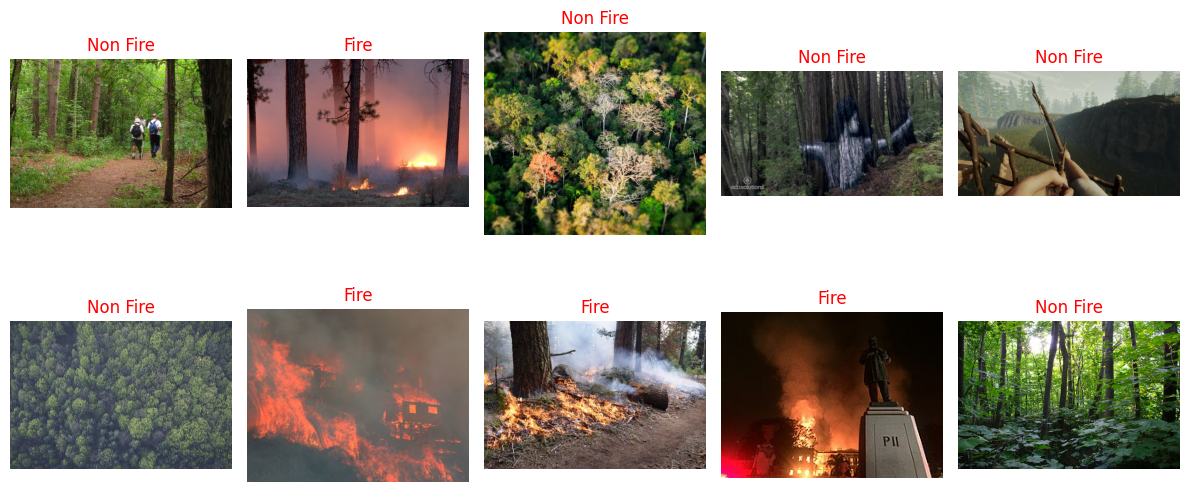

In [ ]:
display_image_grid(test_images_filepaths, predicted_labels)

In [ ]:
import matplotlib.pyplot as plt

# Inicializar una lista para almacenar los valores de pérdida
losses = []

# Bucle principal de entrenamiento
for epoch in range(1, params["epochs"] + 1):
    # Resto del código de entrenamiento aquí...
    inputs, targets = inputs.to(params["device"]), targets.to(params["device"])
    outputs = model(inputs)
    targets = targets.view(-1, 1)

    # Perdida
    loss = criterion(outputs, targets)
    #Retropropagacion
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

 #   print(f'Epoch {epoch}/{params["epochs"]}, Loss: {loss.item()}')


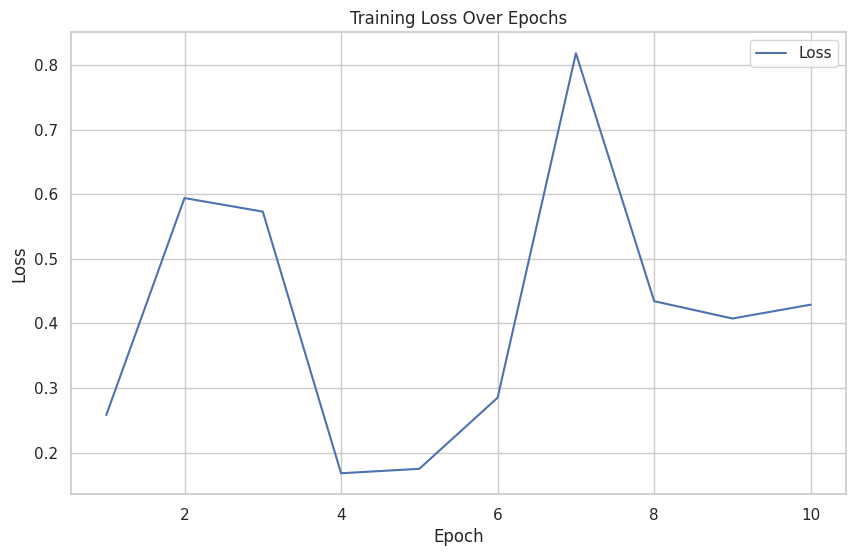

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un DataFrame para la visualización de la pérdida
df_losses = pd.DataFrame({'Epoch': range(1, params["epochs"] + 1), 'Loss': losses})

# Graficar la pérdida después de cada época usando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='Loss', data=df_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()
